<a href="https://colab.research.google.com/github/anopsy/Datathon/blob/main/Heatwaves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns


In [ ]:
warnings = pd.read_csv("HWWS.csv")
warnings.head(20)

,Country Name,Heatwaves Warning Systems (WMO data),Heatwaves Warning Systems other sources,heatwaves causing deaths,number of events,nth cause of deaths,number of deaths
0,Afghanistan,NaN,NaN,no,NaN,NaN,NaN
1,Albania,NaN,NaN,yes,2.0,8.0,3.0
2,Algeria,Yes,NaN,yes,1.0,5.0,40.0
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,No,NaN,no,NaN,NaN,NaN
5,Antigua and Barbuda,NaN,NaN,no,NaN,NaN,NaN
6,Argentina,Yes,NaN,yes,1.0,4.0,100.0
7,Armenia,Yes,NaN,no,NaN,NaN,NaN
8,Australia,No,NaN,yes,7.0,1.0,509.0
9,Austria,Yes,NaN,yes,3.0,1.0,350.0


In [ ]:
warnings['country_name']= warnings['Country Name']


In [ ]:
warnings = warnings.drop('Country Name', axis=1)

In [ ]:
!pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 54.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681833 sha256=3c8452186cc492086e9dd5ea50584dc6cc8a1f0a59f1b4386dbff27c6b67e62d
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


In [ ]:
import pycountry

In [ ]:

# creates 3-letter country code based on the country name
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3

            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code
warnings['country_code']=alpha3code(warnings['country_name'])
warnings.head(20)


,Heatwaves Warning Systems (WMO data),Heatwaves Warning Systems other sources,heatwaves causing deaths,number of events,nth cause of deaths,number of deaths,country_name,country_code
0,NaN,NaN,no,NaN,NaN,NaN,Afghanistan,AFG
1,NaN,NaN,yes,2.0,8.0,3.0,Albania,ALB
2,Yes,NaN,yes,1.0,5.0,40.0,Algeria,DZA
3,NaN,NaN,NaN,NaN,NaN,NaN,Andorra,AND
4,No,NaN,no,NaN,NaN,NaN,Angola,AGO
5,NaN,NaN,no,NaN,NaN,NaN,Antigua and Barbuda,ATG
6,Yes,NaN,yes,1.0,4.0,100.0,Argentina,ARG
7,Yes,NaN,no,NaN,NaN,NaN,Armenia,ARM
8,No,NaN,yes,7.0,1.0,509.0,Australia,AUS
9,Yes,NaN,yes,3.0,1.0,350.0,Austria,AUT


In [ ]:
warnings['country_code'].values

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'AUS',
       'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ',
       'BEN', 'BTN', 'None', 'BIH', 'BWA', 'BRA', 'None', 'BRN', 'BGR',
       'BFA', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'CAF', 'TCD', 'CHL',
       'CHN', 'COL', 'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB',
       'None', 'CYP', 'None', 'None', 'None', 'DNK', 'DJI', 'DMA', 'DOM',
       'ECU', 'EGY', 'SLV', 'ERI', 'EST', 'SWZ', 'ETH', 'FJI', 'FIN',
       'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GTM',
       'GIN', 'None', 'GUY', 'HTI', 'HND', 'None', 'HUN', 'ISL', 'IND',
       'IDN', 'None', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR',
       'KAZ', 'KEN', 'KIR', 'KWT', 'KGZ', 'None', 'LVA', 'LBN', 'LSO',
       'LBR', 'LBY', 'LTU', 'LUX', 'None', 'MDG', 'MWI', 'MYS', 'MDV',
       'MLI', 'MLT', 'MRT', 'MUS', 'MEX', 'None', 'MCO', 'MNG', 'MNE',
       'MAR', 'MOZ', 'MMR', 'NAM', 'NRU', 'NPL', 'NLD', 'NCL', 'NZL',
       '

In [ ]:
missing_codes = warnings[warnings['country_code']=='None']


In [ ]:
missing_codes

,Heatwaves Warning Systems (WMO data),Heatwaves Warning Systems other sources,heatwaves causing deaths,number of events,nth cause of deaths,number of deaths,country_name,country_code
20,NaN,NaN,NaN,NaN,NaN,NaN,Bolivia (Plurinational State of),None
24,No,NaN,NaN,NaN,NaN,NaN,British Caribbean Territories,None
45,NaN,NaN,NaN,NaN,NaN,NaN,Curaçao and Sint Maarten,None
47,Yes,NaN,NaN,NaN,NaN,NaN,Czech Republic,None
48,NaN,NaN,yes,1.0,NaN,0.0,Democratic People's Republic of Korea,None
49,NaN,NaN,no,NaN,NaN,NaN,Democratic Republic of the Congo,None
73,Yes,NaN,no,NaN,NaN,NaN,Guinea Bissau,None
77,Yes,NaN,NaN,NaN,NaN,NaN,"Hong Kong, China",None
82,NaN,NaN,NaN,NaN,NaN,NaN,Iran (Islamic Republic of),None
95,No,NaN,no,NaN,NaN,NaN,Lao People’s Democratic Republic,None


In [ ]:
missing_codes_index = missing_codes.index
print(missing_codes_index)

Int64Index([ 20,  24,  45,  47,  48,  49,  73,  77,  82,  95, 103, 113, 142,
            143, 162, 182, 183, 184, 188, 189],
           dtype='int64')


CHanging British Caribbean Territories to BCT but I'll consider separating it into Anguilla ,Bermuda (sometimes included as part of the BWI), British Virgin Islands, Cayman Islands, Montserrat,
Turks and Caicos Islands

In [ ]:
missing_codes_code = ['BOL','BCT','CUW', 'CZE', 'PRK', 'COD', 'GNB', 'HKG', 'IRN', 'LAO', 'MAC', 'FSM', 'KOR', 'MDA', 'SSD', 'GBR','TZA','USA','VEN', 'VNM']

In [ ]:
print(len(missing_codes_index))
print(len(missing_codes_code))

20
20


In [ ]:
print(warnings.iloc[20,7])

None


In [ ]:
for i, index in enumerate(missing_codes_index):
  warnings.iloc[index, 7] = missing_codes_code[i]

print(warnings.iloc[20,7])

BOL


In [ ]:
#sanitycheck for codes
print(warnings[warnings['country_code']=='None'])

Empty DataFrame
Columns: [Heatwaves Warning Systems (WMO data), Heatwaves Warning Systems other sources, heatwaves causing deaths, number of events, nth cause of deaths, number of deaths, country_name, country_code]
Index: []


In [ ]:
warnings['country_code'].values


array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'AUS',
       'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ',
       'BEN', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BCT', 'BRN', 'BGR',
       'BFA', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'CAF', 'TCD', 'CHL',
       'CHN', 'COL', 'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB',
       'CUW', 'CYP', 'CZE', 'PRK', 'COD', 'DNK', 'DJI', 'DMA', 'DOM',
       'ECU', 'EGY', 'SLV', 'ERI', 'EST', 'SWZ', 'ETH', 'FJI', 'FIN',
       'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GTM',
       'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND',
       'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR',
       'KAZ', 'KEN', 'KIR', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO',
       'LBR', 'LBY', 'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MYS', 'MDV',
       'MLI', 'MLT', 'MRT', 'MUS', 'MEX', 'FSM', 'MCO', 'MNG', 'MNE',
       'MAR', 'MOZ', 'MMR', 'NAM', 'NRU', 'NPL', 'NLD', 'NCL', 'NZL',
       'NIC', 'NER',

In [ ]:
warnings[:-20]

,Heatwaves Warning Systems (WMO data),Heatwaves Warning Systems other sources,heatwaves causing deaths,number of events,nth cause of deaths,number of deaths,country_name,country_code
0,NaN,NaN,no,NaN,NaN,NaN,Afghanistan,AFG
1,NaN,NaN,yes,2.0,8.0,3.0,Albania,ALB
2,Yes,NaN,yes,1.0,5.0,40.0,Algeria,DZA
3,NaN,NaN,NaN,NaN,NaN,NaN,Andorra,AND
4,No,NaN,no,NaN,NaN,NaN,Angola,AGO
...,...,...,...,...,...,...,...,...
168,Yes,NaN,yes,1.0,1.0,1039.0,Switzerland,CHE
169,NaN,NaN,no,NaN,NaN,NaN,Syrian Arab Republic,SYR
170,NaN,NaN,no,NaN,NaN,NaN,Tajikistan,TJK
171,No,NaN,no,NaN,NaN,NaN,Thailand,THA


In [ ]:
warnings.describe()

,Heatwaves Warning Systems other sources,number of events,nth cause of deaths,number of deaths
count,0.0,47.000000,39.000000,47.000000
mean,NaN,3.936170,4.256410,3396.617021
std,NaN,5.032089,4.458687,9498.256269
min,NaN,1.000000,1.000000,0.000000
25%,NaN,1.000000,1.000000,13.500000
50%,NaN,2.000000,2.000000,138.000000
75%,NaN,5.000000,6.000000,1079.500000
max,NaN,25.000000,17.000000,56032.000000


In [ ]:
import geopandas as gp

In order to map the information found on WMO website, I need to turn my dataframe into geodataframe.
I downloaded a geodataframe from https://www.kaggle.com/datasets/syedjaferk/world-polygon-geometry?resource=download
and merged it with my dataframe


In [ ]:
countries_gdf = gp.read_file('countries.geo.json')

In [ ]:
countries_gdf.head()

,id,name,geometry
0,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
2,ALB,Albania,"POLYGON ((20.59025 41.85540, 20.46317 41.51509..."
3,ARE,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000..."


In [ ]:
countries_gdf['id'].values
print(countries_gdf[countries_gdf['id']=='-99'])

      id             name                                           geometry
39   -99  Northern Cyprus  POLYGON ((32.73178 35.14003, 32.80247 35.14550...
147  -99       Somaliland  POLYGON ((48.93813 9.45175, 48.48674 8.83763, ...


In [ ]:
geo_warnings = countries_gdf.merge(warnings, how='left', left_on='id', right_on='country_code')

In [ ]:
geo_warnings.head()

,id,name,geometry,Heatwaves Warning Systems (WMO data),Heatwaves Warning Systems other sources,heatwaves causing deaths,number of events,nth cause of deaths,number of deaths,country_name,country_code
0,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066...",NaN,NaN,no,NaN,NaN,NaN,Afghanistan,AFG
1,AGO,Angola,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6...",No,NaN,no,NaN,NaN,NaN,Angola,AGO
2,ALB,Albania,"POLYGON ((20.59025 41.85540, 20.46317 41.51509...",NaN,NaN,yes,2.0,8.0,3.0,Albania,ALB
3,ARE,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",No,NaN,no,NaN,NaN,NaN,United Arab Emirates,ARE
4,ARG,Argentina,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000...",Yes,NaN,yes,1.0,4.0,100.0,Argentina,ARG


In [ ]:
geo_warnings['country_code'].values

array(['AFG', 'AGO', 'ALB', 'ARE', 'ARG', 'ARM', nan, nan, 'AUS', 'AUT',
       'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHS', 'BIH',
       'BLR', 'BLZ', nan, 'BOL', 'BRA', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN',
       'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'CRI',
       'CUB', nan, 'CYP', 'CZE', 'DEU', 'DJI', 'DNK', 'DOM', 'DZA', 'ECU',
       'EGY', 'ERI', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', nan, 'FRA', 'GAB',
       'GBR', 'GEO', 'GHA', 'GIN', 'GMB', 'GNB', nan, 'GRC', nan, 'GTM',
       nan, 'GUY', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN',
       'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN',
       'KGZ', 'KHM', 'KOR', nan, 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LKA',
       'LSO', 'LTU', 'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MEX', 'MKD',
       'MLI', 'MLT', 'MMR', 'MNE', 'MNG', 'MOZ', 'MRT', 'MWI', 'MYS',
       'NAM', 'NCL', 'NER', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'NZL',
       'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'PNG', 'POL', nan

In [ ]:
geo_warnings['id'].values

array(['AFG', 'AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'ATA', 'ATF', 'AUS',
       'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHS',
       'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRN', 'BTN', 'BWA',
       'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG',
       'COL', 'CRI', 'CUB', '-99', 'CYP', 'CZE', 'DEU', 'DJI', 'DNK',
       'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESP', 'EST', 'ETH', 'FIN',
       'FJI', 'FLK', 'FRA', 'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GMB',
       'GNB', 'GNQ', 'GRC', 'GRL', 'GTM', 'GUF', 'GUY', 'HND', 'HRV',
       'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR',
       'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KOR',
       'CS-KM', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LKA', 'LSO', 'LTU',
       'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MEX', 'MKD', 'MLI', 'MLT',
       'MMR', 'MNE', 'MNG', 'MOZ', 'MRT', 'MWI', 'MYS', 'NAM', 'NCL',
       'NER', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'NZL', 'OMN', 'PAK',
       'PAN', 'PER

In [ ]:
geo_warnings.to_file("geo_warnings.geojson", driver='GeoJSON')

In [ ]:
geo_warnings['area'] = geo_warnings.area
geo_warnings['boundary'] = geo_warnings.boundary
geo_warnings['centroid'] = geo_warnings.centroid

<ipython-input-29-b78e92ff6c18>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geo_warnings['area'] = geo_warnings.area
<ipython-input-29-b78e92ff6c18>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geo_warnings['centroid'] = geo_warnings.centroid


In [ ]:
geo_warnings.to_excel("geo_data.xlsx")

<Axes: >

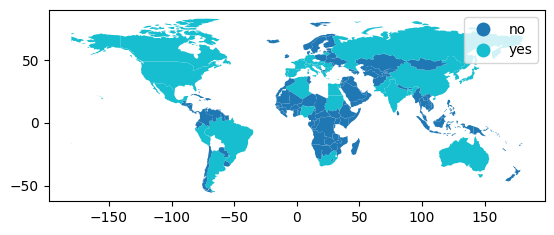

In [ ]:
geo_warnings.plot('heatwaves causing deaths', legend = True)

<Axes: >

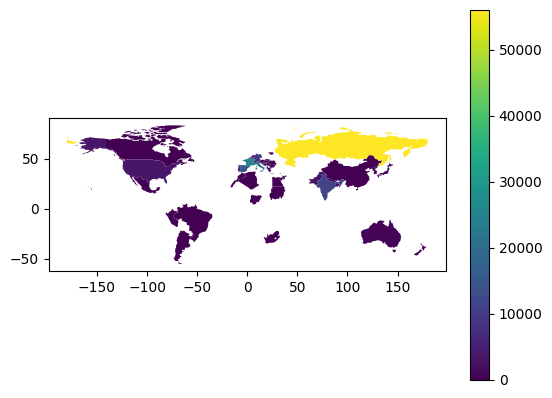

In [ ]:
geo_warnings.plot('number of deaths', legend = True)

In [ ]:
geo_warnings['name'].values


array(['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates',
       'Argentina', 'Armenia', 'Antarctica',
       'French Southern and Antarctic Lands', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'The Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Brunei',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', 'Ivory Coast', 'Cameroon',
       'Democratic Republic of the Congo', 'Republic of the Congo',
       'Colombia', 'Costa Rica', 'Cuba', 'Northern Cyprus', 'Cyprus',
       'Czech Republic', 'Germany', 'Djibouti', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea',
       'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji',
       'Falkland Islands', 'France', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', 'Guinea', 'Gambia', 'Guinea Bissau', 'Equatorial Guinea

In [ ]:
countries = geo_warnings[['name', 'country_name']]
countries.to_excel('countries.xlsx')

In [ ]:
heatwaves = gp.read_file('geo_warnings.geojson')

**id/ country_code** are both still in the dataframe, because country_code column misses the codes for British Carribean Territories (for example Bermuda) and WMO website only lists British Carribean Territories and not the separate countries.

**Heatwaves Warning Systems (WMO data)** - states if the country has a heatwave warning system

    **yes** - the country has a warning system

    **no** - the country has other warning systems but no heatwave warning system

    **NaN** - there was no data on the WMO about warning systems in that country

**Heatwaves Warning Systems other sources** - this should be filled with data found online (for example in case of Australia there's no heatwave warning system mentioned on WMO-website, but you can find publications on Google Scholar, that it's under construction)

**heatwaves causing deaths** -

    **yes** - heatwaves caused deaths in 1970-2015

    **no** - heatwaves occured but no deaths were reported in 1970-2015

    **NaN** - no data

**number of deaths** - number of reported deaths due to heatwaves 1970-2015

**nth cause of deaths** - number of deaths caused by heatwaves in comparison to other meterological hazards (floods, cold waves etc)
in 1970-2015

**number of deaths** - reported number of heatwaves that occured in the given country in 1970-2015

NOTES: data reported by countries is incomplete, e.g. Poland doesn't list heatwaves as a cause of deaths on WMO website while every year hundreds of deaths are reported in the media








In [ ]:
heatwaves.head()

,id,name,Heatwaves Warning Systems (WMO data),Heatwaves Warning Systems other sources,heatwaves causing deaths,number of events,nth cause of deaths,number of deaths,country_name,country_code,geometry
0,AFG,Afghanistan,NaN,NaN,no,NaN,NaN,NaN,Afghanistan,AFG,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,No,NaN,no,NaN,NaN,NaN,Angola,AGO,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
2,ALB,Albania,NaN,NaN,yes,2.0,8.0,3.0,Albania,ALB,"POLYGON ((20.59025 41.85540, 20.46317 41.51509..."
3,ARE,United Arab Emirates,No,NaN,no,NaN,NaN,NaN,United Arab Emirates,ARE,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,Yes,NaN,yes,1.0,4.0,100.0,Argentina,ARG,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000..."
